In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

import sys, os
import glob
import shutil

from pathlib import Path

from sklearn.model_selection import train_test_split

In [68]:
def create_folders(df, name, col):
    dest = Path(f'../../data/main_dataset/{name}')
    dest.mkdir(parents=True, exist_ok=True)
    
    for f in df[col]:
        shutil.copy(f, dest)

In [72]:
def generate_dataframes(data_dir = None,
                        random_state = 42, 
                        random_lock = True):
    
    """ Generate 3 .csv dataframes (train, validation, test) from folder Leukopy/data (GitHub). 
       
    data_dir : Path Object or str, path to images
    random_state : int, default 42 for reproducibility
    random_lock : bool., lock the value of random_state
    """
    # To work with the same split. 
    if random_lock == True:
        if random_state != 42:
            random_state = 42
            
    # Verification : path to data files
    if data_dir == None:
        return "Please provide the path of the directory 'Leukopy' "
    
    path = Path(data_dir)
  
    
    data = pd.DataFrame()
    data['img_paths'] = [image_path for ext in ['jpg', 'tif', 'png'] for image_path in path.glob(f'**/*.{ext}')]
       
    #for sanity check
    data['label'] = [image_path.stem.split('_')[0] for ext in ['jpg', 'tif', 'png'] for image_path in path.glob(f'**/*.{ext}')]
    data['label'] = data['label'].replace(to_replace = ["NEUTROPHIL", "PLATELET"], 
                                  value = ["SNE", "PLT"])
    
    #remove label IG
    data = data[~(data.label == 'IG')] 

    # Conversion to DataFrames
    df_train, df_test = train_test_split(data, test_size = 0.15, random_state = random_state)
    df_train, df_valid = train_test_split(df_train, test_size = 0.12, random_state = random_state)
    
    # Save DFs : .CSV files
    df_train.to_csv(path_or_buf = path/'train_set.csv')
    df_valid.to_csv(path_or_buf = path/'valid_set.csv')
    df_test.to_csv(path_or_buf = path/'test_set.csv')
    
    
    return df_train, df_test, df_valid

In [73]:
def generate_images_df(data_dir = None):
    
    """ Generate 3 .csv dataframes (train, validation, test) from folder Leukopy/data (GitHub). 
    Image folders are grouped by cell types and images either label by :
    12 classes (label):  BA, BL, BNE, ERB, EO, LY, MMY, MO, MY, PLT, PMY, SNE
    9 classes (label2):  BA, BL, IG, ERB, EO, LY, MO, PLT, NEU
    10 classes (label3):  BA, BL, BNE, ERB, EO, LY, IG, MO, PLT, SNE
        
    data_dir : Path Object or str, path to images

    """
   
    # Verification : path to data files
    if data_dir == None:
        return "Please provide the path of the directory 'Leukopy' "
    
    path = Path(data_dir)
  
    data = pd.DataFrame()
    data['img_paths'] = [image_path for ext in ['jpg', 'tif', 'png'] for image_path in path.glob(f'**/*.{ext}')]
    data['cell_type'] = [image_path.parts[-2] for ext in ['jpg', 'tif', 'png'] for image_path in path.glob(f'**/*.{ext}')]

    data['label'] = [image_path.stem.split('_')[0] for ext in ['jpg', 'tif', 'png'] for image_path in path.glob(f'**/*.{ext}')]
    data['label'] = data['label'].replace(to_replace = ["NEUTROPHIL", "PLATELET"], 
                                  value = ["SNE", "PLT"])
    
    data['label_2'] = data['label'].replace(to_replace = ["BNE","NEUTROPHIL", "MY","MMY","PMY", "PLATELET"], 
                                  value = ["IG","SNE", "IG","IG","IG", "PLT"])
    
    data['label_3'] = data['label'].replace(to_replace = ["NEUTROPHIL", "MY","MMY","PMY", "PLATELET"], 
                                  value = ["SNE", "IG","IG","IG", "PLT"])
    
    
    return data

In [74]:
df_train, df_test, df_valid = generate_dataframes('../../data/PBC_dataset_normal_ALL/')

In [75]:
#create folders:
create_folders(df_train, 'training_set', 'img_paths')
create_folders(df_test, 'testing_set', 'img_paths')
create_folders(df_valid, 'validation_set', 'img_paths')

### Sanity check: repartition of classes

/home/marie-anne/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

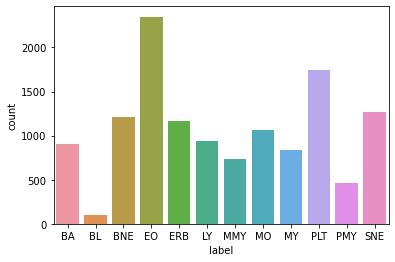

In [76]:
sns.countplot(df_train.label.sort_values())

/home/marie-anne/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

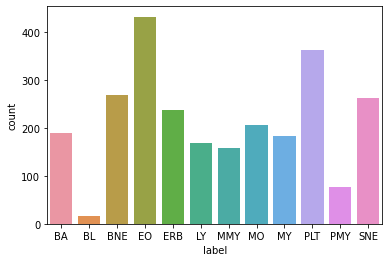

In [77]:
sns.countplot(df_test.label.sort_values())

/home/marie-anne/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

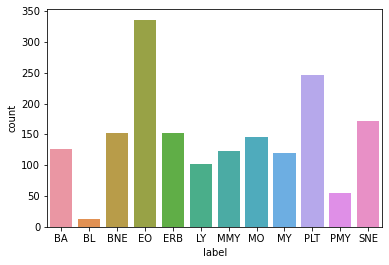

In [78]:
sns.countplot(df_valid.label.sort_values())

# Example of df creation from image subfolder

In [79]:
generate_images_df('../../data/main_dataset/training_set/')

,img_paths,cell_type,label,label_2,label_3
0,../../data/main_dataset/training_set/PLATELET_...,training_set,PLT,PLT,PLT
1,../../data/main_dataset/training_set/ERB_65190...,training_set,ERB,ERB,ERB
2,../../data/main_dataset/training_set/BA_944690...,training_set,BA,BA,BA
3,../../data/main_dataset/training_set/PLATELET_...,training_set,PLT,PLT,PLT
4,../../data/main_dataset/training_set/MMY_54412...,training_set,MMY,IG,IG
...,...,...,...,...,...
12763,../../data/main_dataset/training_set/BL_018_1.tif,training_set,BL,BL,BL
12764,../../data/main_dataset/training_set/BL_051_1.tif,training_set,BL,BL,BL
12765,../../data/main_dataset/training_set/BL_008_1.tif,training_set,BL,BL,BL
12766,../../data/main_dataset/training_set/BL_105_1.tif,training_set,BL,BL,BL
